In [1]:
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import sleepPy.preprocessing as prep
import sleepPy.plots as plot
import actiPy.actogram_plot as aplot

In [2]:
def quickplot_h(data):
    data.resample("H").mean().plot(subplots=True,
                                  figsize=(10,10))
def quickplot(data, figsize=(10, 10)):
    data.plot(subplots=True,
               figsize=figsize)

In [3]:
col_names = ["Chamber", "PIR1", "PIR2", "PIR3", "PIR4", "PIR5", "PIR6", "LDR"]

In [4]:
pir_files_dir = pathlib.Path('/Users/angusfisk/Documents/01_PhD_files/09_pirdata')

exp_filesdir = pir_files_dir / "03_experiment_files"

In [5]:
# read df's in
exp = sorted(exp_filesdir.glob("exp_5*"))

file = exp[3]
df = pd.read_csv(file, 
                 index_col=[0],
                 parse_dates=True)

In [6]:
df.columns=col_names
df.drop(col_names[0], axis=1, inplace=True)
df.sort_index(inplace=True)

In [7]:
df.head()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2016-09-19 14:34:53.063,0.0,0.0,0.0,0.0,0.0,0.0,314.0
2016-09-19 14:35:03.074,0.0,0.0,0.0,0.0,0.0,0.0,316.0
2016-09-19 14:35:13.084,0.0,0.0,0.0,0.0,0.0,0.0,314.0
2016-09-19 14:35:23.094,0.0,0.0,0.0,0.0,0.0,0.0,275.0
2016-09-19 14:35:33.105,0.0,0.0,0.0,0.0,0.0,0.0,301.0


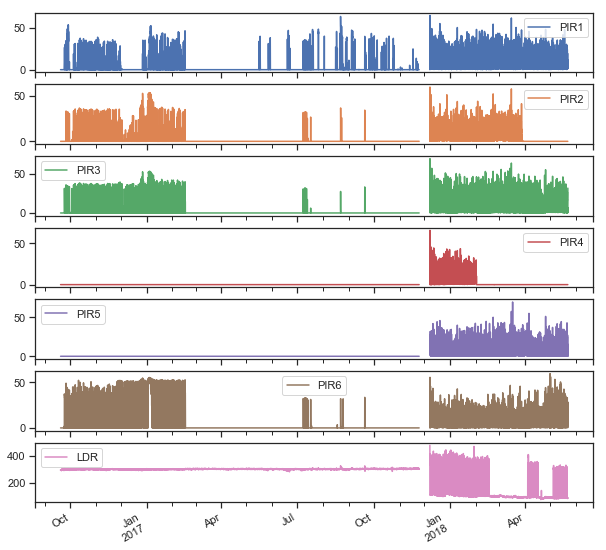

In [8]:
quickplot_h(df)

In [9]:
# Separate into just the ageing part 
start_date = "2016-10-04"
finish_date = '2017-10-04'
ageing_data = df.loc[start_date:finish_date].copy()

In [10]:
ageing_data.head()


,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2016-10-04 00:00:02.520,0.0,0.0,0.0,0.0,0.0,0.0,312.0
2016-10-04 00:00:12.530,0.0,0.0,0.0,0.0,0.0,0.0,320.0
2016-10-04 00:00:22.540,0.0,0.0,0.0,0.0,0.0,0.0,275.0
2016-10-04 00:00:32.550,0.0,0.0,0.0,0.0,0.0,0.0,311.0
2016-10-04 00:00:42.561,0.0,0.0,0.0,0.0,0.0,0.0,291.0


In [11]:
ageing_data.tail()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-10-04 23:59:14.471,0.0,0.0,0.0,0.0,0.0,0.0,311.0
2017-10-04 23:59:24.481,0.0,0.0,0.0,0.0,0.0,0.0,310.0
2017-10-04 23:59:34.492,0.0,0.0,0.0,0.0,0.0,0.0,309.0
2017-10-04 23:59:44.502,0.0,0.0,0.0,0.0,0.0,0.0,308.0
2017-10-04 23:59:54.511,0.0,0.0,0.0,0.0,0.0,0.0,307.0


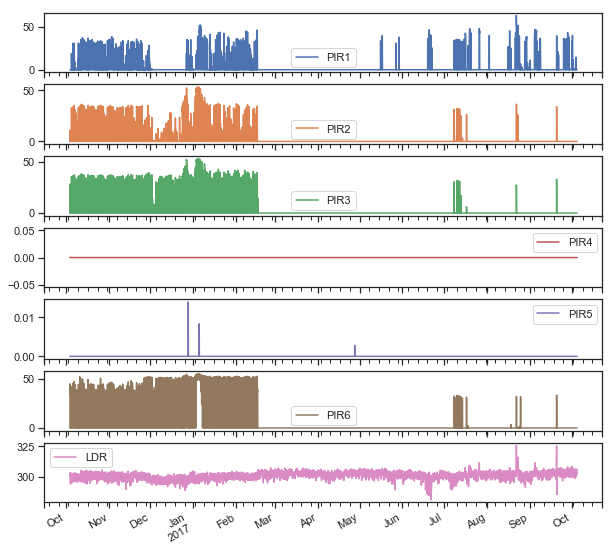

In [12]:
# check the data is all there and looks good 
quickplot_h(ageing_data)

Lots of problems going on here  
LDR running down over time  
PIR 1 corrupted from the start  
PIR 2 lost animals due to fighting  
PIR 3/4/5 fine  
PIR 6 had a month of dropout  

Plan:
Check for weekends with actogram  
Check on what PIR 1 looks like. Is it all useless or is it salvageable?  
For now remove PIR 1/2/6 and ask what the best thing to do about missing data is later.   


(<Figure size 720x1440 with 367 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2a211080>)

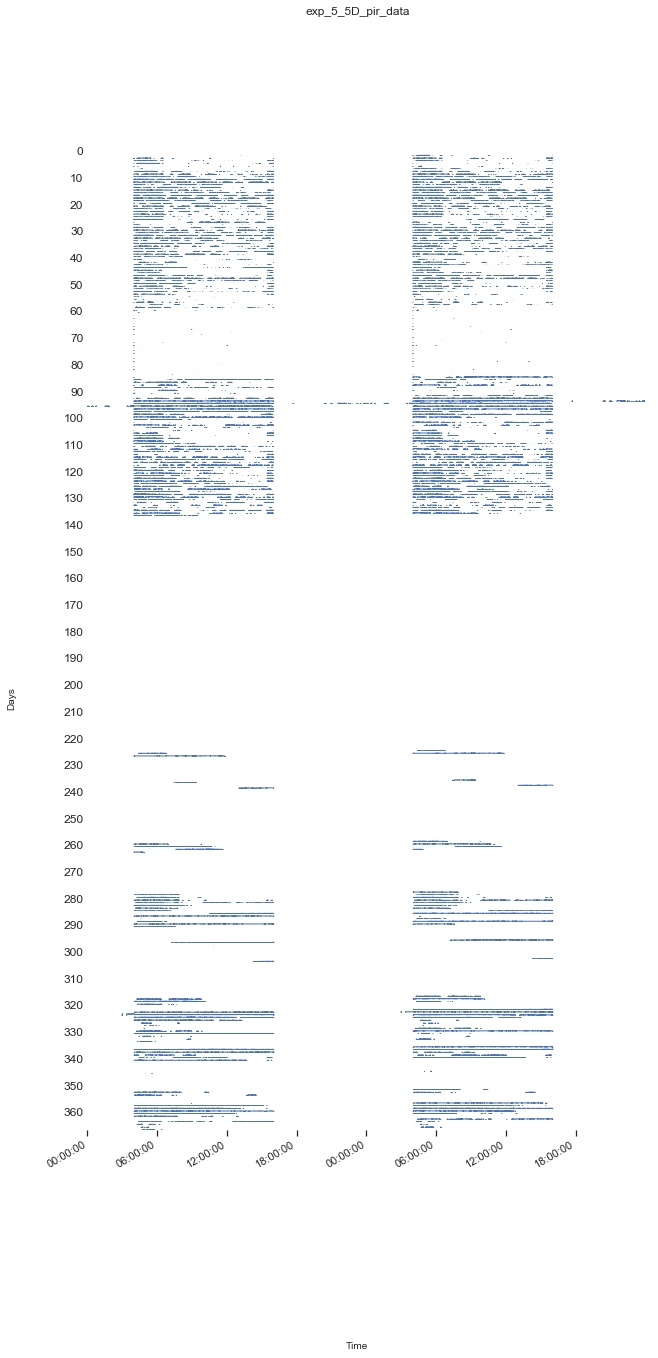

In [13]:
# Check on PIR 1
aplot._actogram_plot_from_df(ageing_data, 0, drop_level=False, fname=file, figsize=(10, 20), test_col=3)

Conclusion? PIR 1 is entirely gone and unsalvageable, looks like we had an incorrectly connected channel on the arduino so the light channel was recorded as activity.  
This should mean that the PIR 1 activity data was recorded somewhere, but it wasn't a simple swap with the light channel so unknown where it is at the moment. May chase the location up later. 

(<Figure size 720x1440 with 367 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4e517d68>)

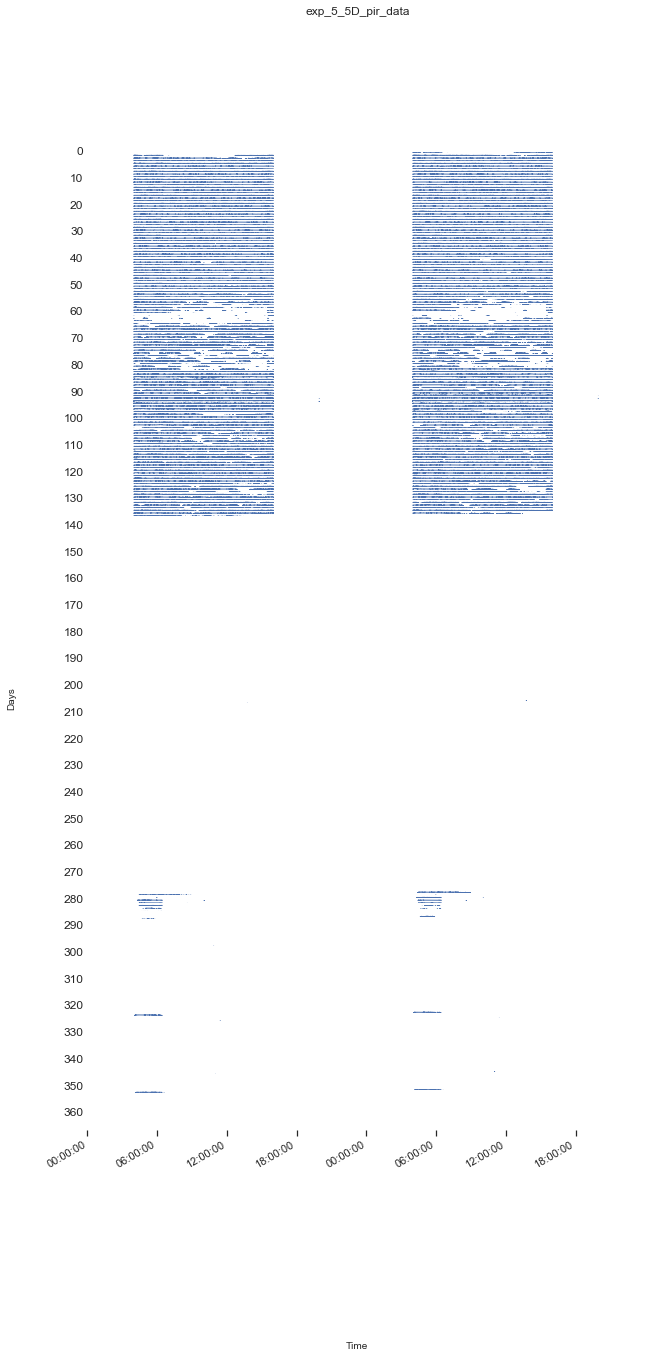

In [14]:
# Check on PIR 3
aplot._actogram_plot_from_df(ageing_data, 2, drop_level=False, fname=file, figsize=(10, 20), test_col=3)

Biggest problem is that at some points the lights invert. <- Due to LDR remap function using non-functioning PIR 1 as the test column for when to stop inverting the lights


(<Figure size 720x1440 with 367 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a88a07358>)

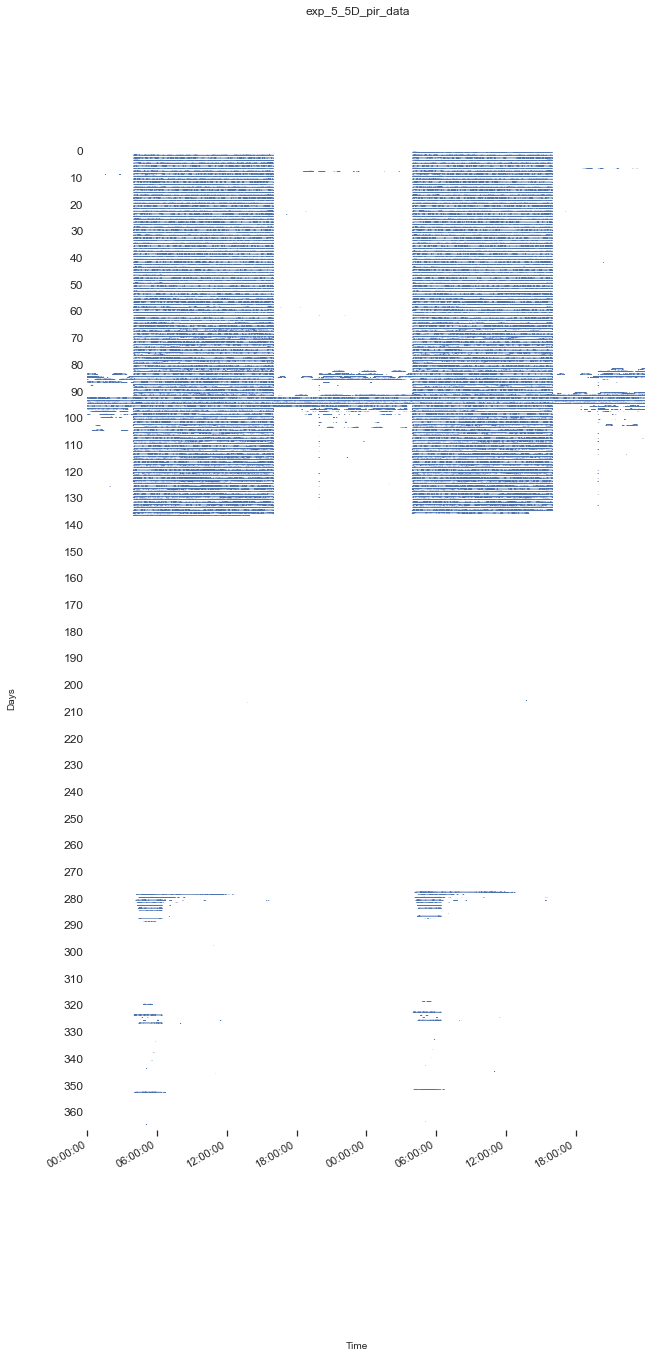

In [15]:
# Check on PIR 6 - how big is the gap? Is there any data there?
aplot._actogram_plot_from_df(ageing_data, 5, drop_level=False, fname=file, figsize=(10, 20), test_col=3)

Message is there is about a month of data missing and there is nothing there to salvage

In [16]:
ageing_data.drop([col_names[1], col_names[2], col_names[-2]], axis=1, inplace=True)

In [17]:
ageing_data.head()

,PIR3,PIR4,PIR5,LDR
2016-10-04 00:00:02.520,0.0,0.0,0.0,312.0
2016-10-04 00:00:12.530,0.0,0.0,0.0,320.0
2016-10-04 00:00:22.540,0.0,0.0,0.0,275.0
2016-10-04 00:00:32.550,0.0,0.0,0.0,311.0
2016-10-04 00:00:42.561,0.0,0.0,0.0,291.0


In [18]:
save_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                        "01_projects/01_thesisdata/04_ageing/01_datafiles/01_activity")

save_name = save_dir / "sj.csv" 

ageing_data.to_csv(save_name)

Now to find the post_disruption period of group housing



In [19]:
start_post = '2017-10-05'
end_post = '2017-11-23'

post_data = df.loc[start_post:end_post]

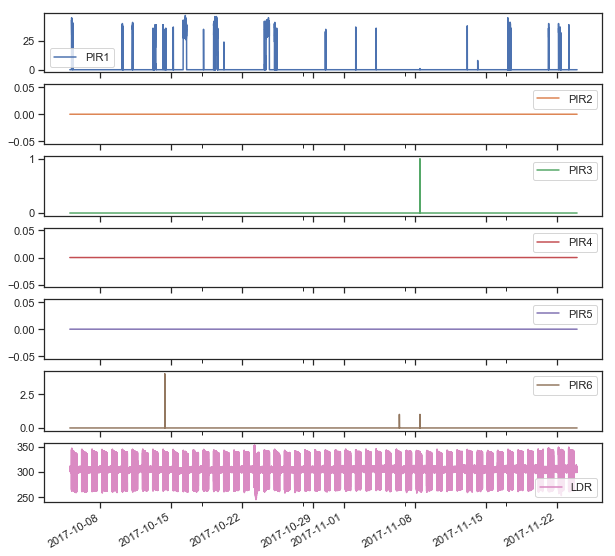

In [20]:
quickplot(post_data)

In [21]:
post_save_name = save_dir / "01_post_disrupt/sj_post.csv"

post_data.to_csv(post_save_name)

In [22]:
label_col_name = "light_period"

In [23]:
start_single = '2017-12-22'
end_single = '2018-04-03'

single_data = df.loc[start_single:end_single].copy()

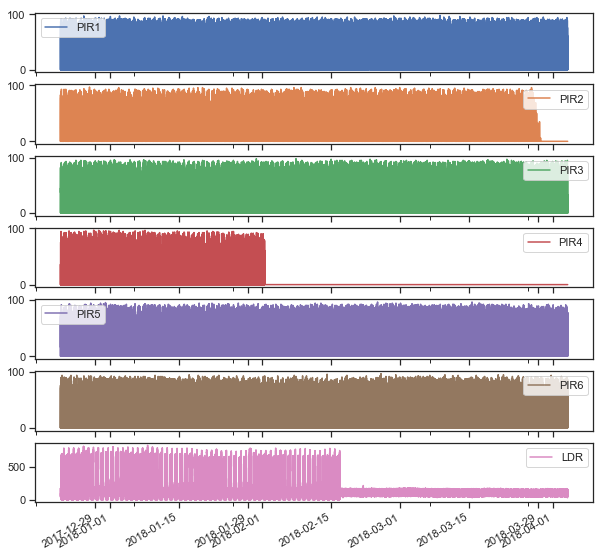

In [24]:
quickplot(single_data)


(<Figure size 720x1440 with 104 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a22484390>)

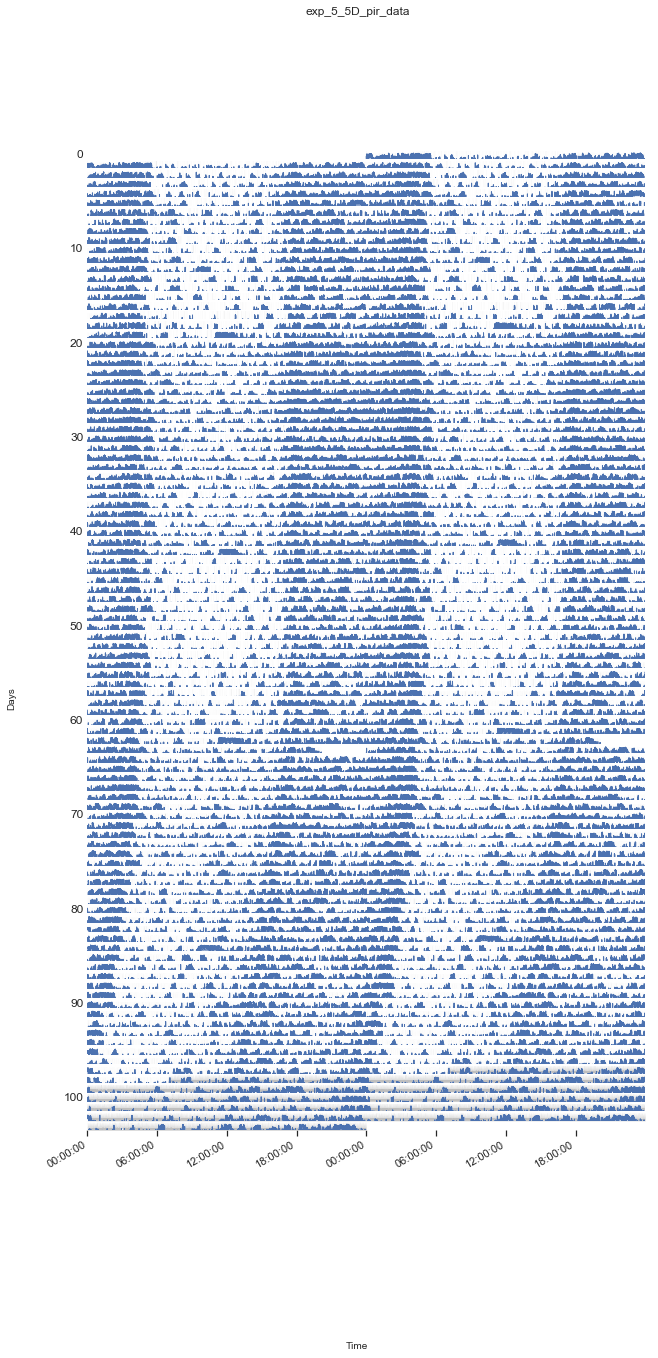

In [25]:
aplot._actogram_plot_from_df(single_data, 2, drop_level=False, fname=file, figsize=(10, 20))

In [26]:
dd_start = '2018-02-17'

ld_data = single_data.loc[start_single:dd_start]

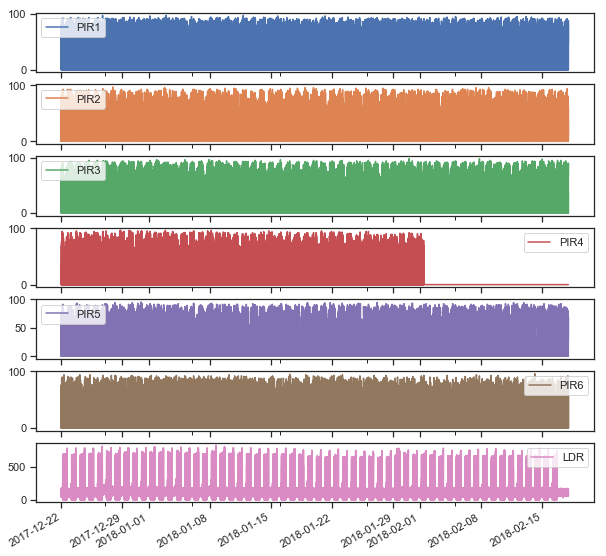

In [27]:
quickplot(ld_data)


In [28]:
single_data.loc[start_single:dd_start, label_col_name] = "ld"

In [29]:
dd_end = "2018-04-03"

dd_data = single_data.loc[dd_start:dd_end]

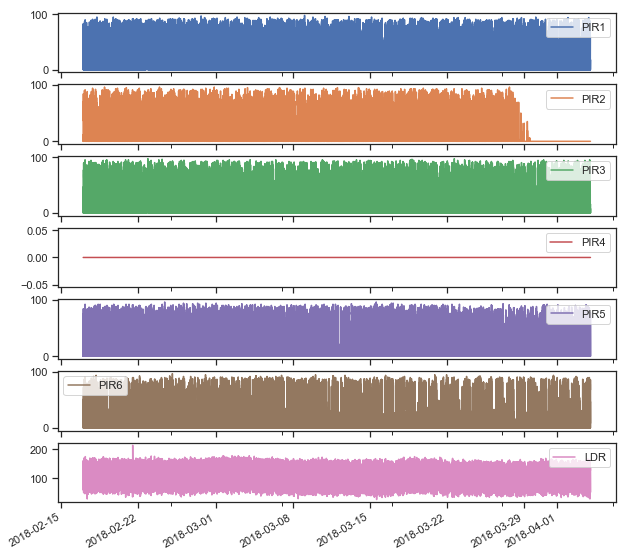

In [30]:
quickplot(dd_data)


In [31]:
single_data.loc[dd_start:dd_end, label_col_name] = "dd"

In [32]:
single_data.head()


,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR,light_period
2017-12-22 00:00:06.830,0.0,0.0,37.0,0.0,16.0,0.0,171.0,ld
2017-12-22 00:00:16.828,0.0,0.0,8.0,0.0,7.0,0.0,135.0,ld
2017-12-22 00:00:26.829,0.0,0.0,44.0,0.0,35.0,0.0,91.0,ld
2017-12-22 00:00:36.829,0.0,0.0,4.0,0.0,8.0,0.0,67.0,ld
2017-12-22 00:00:46.830,0.0,0.0,53.0,0.0,16.0,0.0,116.0,ld


In [33]:
single_save_name = save_dir / "03_single_housed/sj_02.csv"

single_data.to_csv(single_save_name)